In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score

from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
X, y = make_classification(n_samples=500, n_features=10,n_informative=5)

0.829872
0.031734139597600554


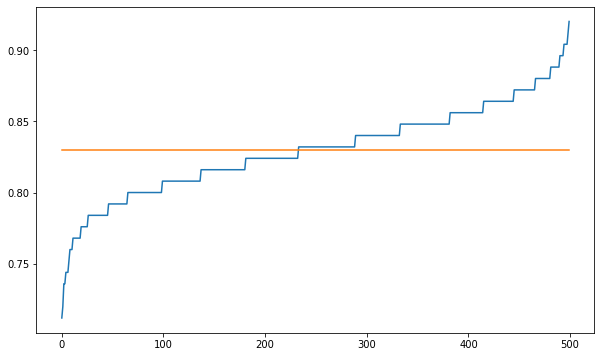

In [86]:
decision_tree = DecisionTreeClassifier()
accuracy_scores = []
for n in range(0,500):
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    decision_tree.fit(X_train,y_train)
    y_pred = decision_tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_pred,y_test))

accuracy_scores.sort()
plt.figure(figsize=(10,6))
plt.plot(range(0,500),accuracy_scores)
plt.plot(range(0,500),[np.mean(accuracy_scores)]*500)
print(np.mean(accuracy_scores))
print(np.std(accuracy_scores))
single_tree_average = np.mean(accuracy_scores)

(array([  2.,   5.,   4.,  15.,  39., 116., 108.,  93.,  63.,  36.,  13.,
          6.]),
 array([0.712     , 0.72933333, 0.74666667, 0.764     , 0.78133333,
        0.79866667, 0.816     , 0.83333333, 0.85066667, 0.868     ,
        0.88533333, 0.90266667, 0.92      ]),
 <a list of 12 Patch objects>)

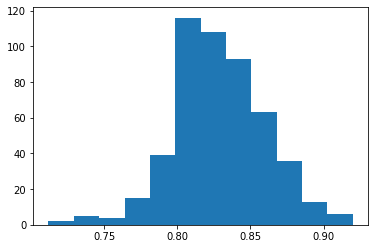

In [95]:
plt.hist(accuracy_scores,bins=12)

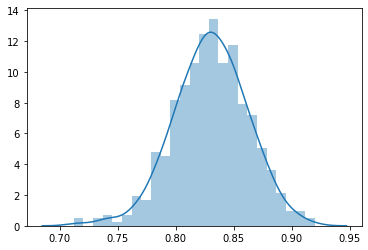

In [100]:
sns.distplot(accuracy_scores,bins=25)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
models = []
for n in range(0,100):
    model = DecisionTreeClassifier()
    X_sample, X_out, y_sample, y_out = train_test_split(X_train,y_train)
    model.fit(X_sample, y_sample)
    models.append(model)

In [5]:
predictions = []
for model in models:
    y_pred = model.predict(X_test)
    predictions.append(y_pred)

In [6]:
bagged_predictions = []
for n in range(0,len(predictions[0])):
    item_preds = []
    for prediction in predictions:
        item_preds.append(prediction[n])
    if np.mean(item_preds) < .5:
        bagged_predictions.append(0)
    else:
        bagged_predictions.append(1)

In [7]:
accuracy_score(y_test,np.array(bagged_predictions))

0.848

In [16]:
"""Replaced with a version that uses numpy's random choice, since the sklearn test train split
is a sample without replacement."""

# def bagged_dtc(X,y,n_models,test_size):
#     X_train, X_test, y_train, y_test = train_test_split(X,y)

#     models = []
#     for n in range(0,n_models):
#         model = DecisionTreeClassifier()
#         X_sample, X_out, y_sample, y_out = train_test_split(X_train,y_train,test_size=test_size)
#         model.fit(X_sample, y_sample)
#         models.append(model)
    
#     predictions = []
#     for model in models:
#         y_pred = model.predict(X_test)
#         predictions.append(y_pred)
    
#     bagged_predictions = []
#     for n in range(0,len(predictions[0])):
#         item_preds = []
#         for prediction in predictions:
#             item_preds.append(prediction[n])
#         if np.mean(item_preds) < .5:
#             bagged_predictions.append(0)
#         else:
#             bagged_predictions.append(1)
#     accuracy = accuracy_score(y_test,np.array(bagged_predictions))
#     return accuracy
                              

In [114]:
def bagged_dtc(X,y,n_models,train_size):
    X_train, X_test, y_train, y_test = train_test_split(X,y)

    models = []
    for n in range(0,n_models):
        model = DecisionTreeClassifier()
        sample_index = np.random.choice(len(X_train),int(len(X_train)*train_size))
        X_sample = X_train[sample_index]
        y_sample = y_train[sample_index]
        model.fit(X_sample, y_sample)
        models.append(model)
    
    predictions = []
    for model in models:
        y_pred = model.predict(X_test)
        predictions.append(y_pred)
    
    bagged_predictions = []
    for n in range(0,len(predictions[0])):
        item_preds = []
        for prediction in predictions:
            item_preds.append(prediction[n])
        if np.mean(item_preds) < .5:
            bagged_predictions.append(0)
        else:
            bagged_predictions.append(1)
    accuracy = accuracy_score(y_test,np.array(bagged_predictions))
    return accuracy

In [115]:
bagged_dtc(X_train,y_train,500,.2)

0.8617021276595744

0.869936170212766
0.036770556006740174


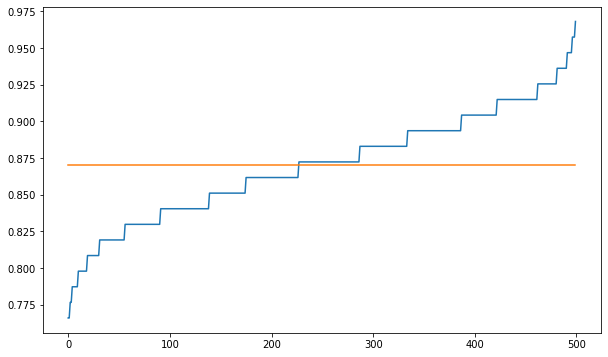

In [116]:
accuracy_scores = []
for n in range(0,500):
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    accuracy_scores.append(bagged_dtc(X_train,y_train,50,.8))

accuracy_scores.sort()
plt.figure(figsize=(10,6))
plt.plot(range(0,500),accuracy_scores)
plt.plot(range(0,500),[np.mean(accuracy_scores)]*500)
print(np.mean(accuracy_scores))
print(np.std(accuracy_scores))

0.8629787234042554
0.03759641295508364


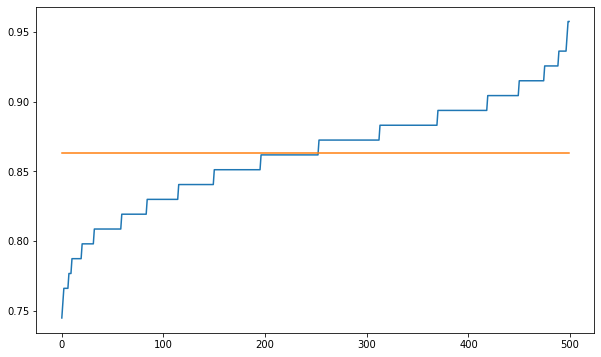

In [26]:
accuracy_scores = []
for n in range(0,500):
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    accuracy_scores.append(bagged_dtc(X_train,y_train,100,.7))

accuracy_scores.sort()
plt.figure(figsize=(10,6))
plt.plot(range(0,500),accuracy_scores)
plt.plot(range(0,500),[np.mean(accuracy_scores)]*500)
print(np.mean(accuracy_scores))
print(np.std(accuracy_scores))

In [11]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)
accuracy_score(rfc.predict(X_test),y_test)

0.952

In [29]:
bagged_accuracies = []
rfc_accuracies = []
for n in range(1,100):
    bagged= []
    rfcs = []
    for i in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(X,y)
        bagged.append(bagged_dtc(X_train,y_train,n,.7))
        rfc = RandomForestClassifier(n_estimators = n)
        rfc.fit(X_train,y_train)
        rfcs.append(accuracy_score(rfc.predict(X_test),y_test))
    bagged_accuracies.append(np.mean(bagged))
    rfc_accuracies.append(np.mean(rfcs))

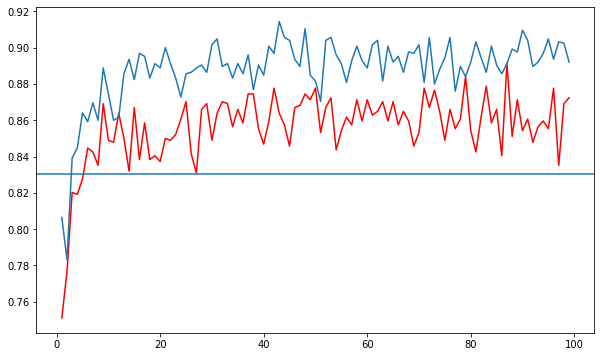

In [30]:

plt.figure(figsize=(10,6))
plt.plot(range(1,100),bagged_accuracies,c='r')
plt.plot(range(1,100),rfc_accuracies)
plt.axhline(single_tree_average)

In [ ]:
accuracy_scores = []
for n in range(0,500):
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    accuracy_scores.append(bagged_dtc(X_train,y_train,50,.9))

accuracy_scores.sort()
plt.figure(figsize=(10,6))
plt.plot(range(0,500),accuracy_scores)
plt.plot(range(0,500),[np.mean(accuracy_scores)]*500)
print(np.mean(accuracy_scores))
print(np.std(accuracy_scores))

0.7682320000000002
0.02682465612081543


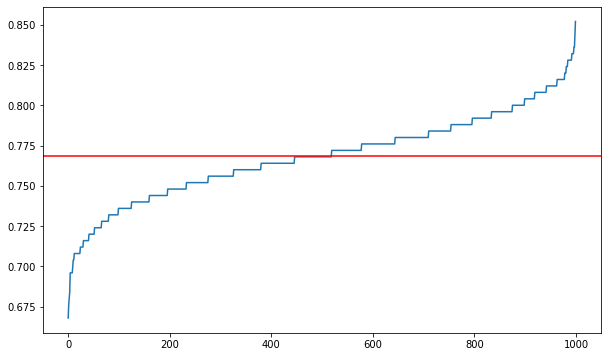

In [104]:
#X2, y2 = make_classification(n_samples=1000, n_features=20,n_informative=10)
decision_tree = DecisionTreeClassifier()
accuracy_scores = []
for n in range(0,1000):
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2)
    decision_tree.fit(X2_train,y2_train)
    y2_pred = decision_tree.predict(X2_test)
    accuracy_scores.append(accuracy_score(y2_pred,y2_test))

accuracy_scores.sort()
plt.figure(figsize=(10,6))
plt.plot(range(0,1000),accuracy_scores)
plt.axhline(np.mean(accuracy_scores),c='r')
print(np.mean(accuracy_scores))
print(np.std(accuracy_scores))
single_tree_average = np.mean(accuracy_scores)

0.8501170212765958
0.028920871659832606


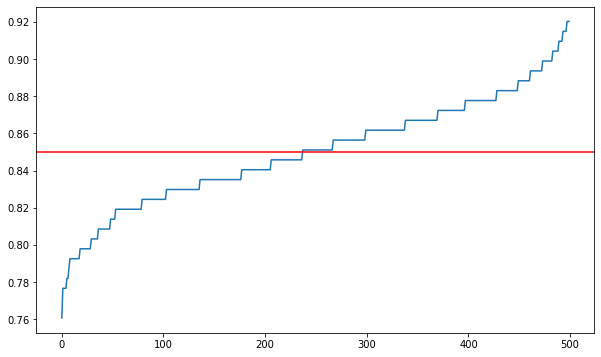

In [117]:
accuracy_scores2 = []
for n in range(0,500):
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2)
    accuracy_scores2.append(bagged_dtc(X2_train,y2_train,100,.8))

accuracy_scores2.sort()
plt.figure(figsize=(10,6))
plt.plot(range(0,500),accuracy_scores2)
plt.axhline(np.mean(accuracy_scores2),c='r')
print(np.mean(accuracy_scores2))
print(np.std(accuracy_scores2))

In [118]:
bagged_accuracies = []
rfc_accuracies = []
for n in range(1,100):
    bagged= []
    rfcs = []
    for i in range(0,10):
        X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2)
        bagged.append(bagged_dtc(X2_train,y2_train,n,.8))
        rfc = RandomForestClassifier(n_estimators = n)
        rfc.fit(X2_train,y2_train)
        rfcs.append(accuracy_score(rfc.predict(X2_test),y2_test))
    bagged_accuracies.append(np.mean(bagged))
    rfc_accuracies.append(np.mean(rfcs))

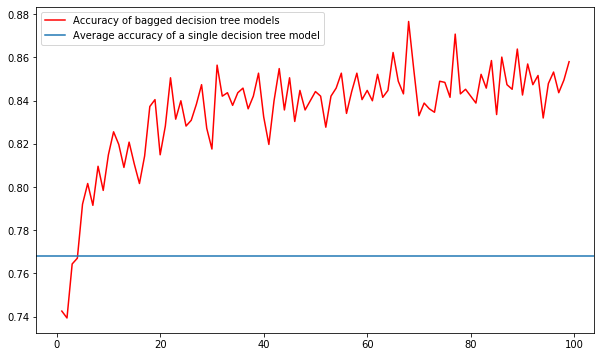

In [127]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),bagged_accuracies,c='r', label='Accuracy of bagged decision tree models')
#plt.plot(range(1,100),rfc_accuracies)
plt.axhline(single_tree_average, label='Average accuracy of a single decision tree model')
plt.legend()

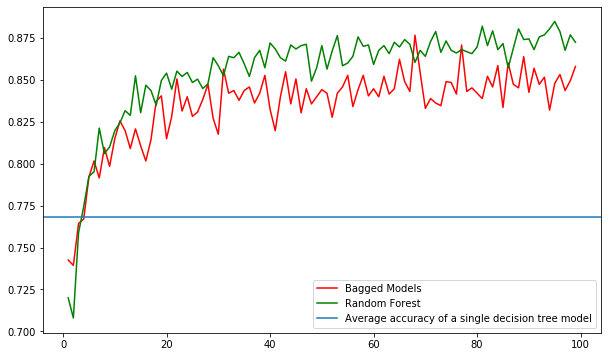

In [139]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),bagged_accuracies,c='r',label='Bagged Models')
plt.plot(range(1,100),rfc_accuracies,c='green',label='Random Forest')
plt.axhline(single_tree_average,label='Average accuracy of a single decision tree model')
plt.legend()

In [64]:
boost = GradientBoostingClassifier(n_estimators=170,learning_rate=.1,max_depth=4)
boost.fit(X2_train,y2_train)
#y_pred = boost.predict(X2_test)
accuracy_score(boost.predict(X2_test),y2_test)

0.896

In [65]:
bagged_accuracies = []
rfc_accuracies = []
boosted_accuracies = []
for n in range(1,100):
    bagged= []
    rfcs = []
    boosts = []
    for i in range(0,10):
        X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2)
        bagged.append(bagged_dtc(X2_train,y2_train,n,.8))
        rfc = RandomForestClassifier(n_estimators = n)
        rfc.fit(X2_train,y2_train)
        rfcs.append(accuracy_score(rfc.predict(X2_test),y2_test))
        boost = GradientBoostingClassifier(n_estimators=n,learning_rate=.1,max_depth=4)
        boost.fit(X2_train,y2_train)
        boosts.append(accuracy_score(boost.predict(X2_test),y2_test))
    bagged_accuracies.append(np.mean(bagged))
    rfc_accuracies.append(np.mean(rfcs))
    boosted_accuracies.append(np.mean(boosts))

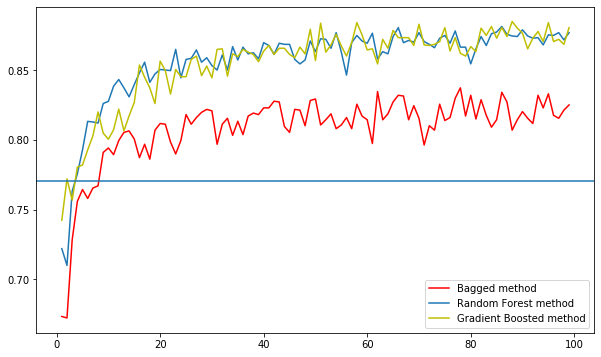

In [73]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),bagged_accuracies,c='r', label='Bagged method')
plt.plot(range(1,100),rfc_accuracies, label='Random Forest method')
plt.plot(range(1,100),boosted_accuracies, c='y', label='Gradient Boosted method')
plt.axhline(single_tree_average)
plt.legend()

In [70]:
boosted_1 = []
boosted_05 = []
boosted_01 = []
for n in range(1,150):
    b1= []
    b05 = []
    b01 = []
    for i in range(0,10):
        X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2)
        boost = GradientBoostingClassifier(n_estimators=n,learning_rate=.1,max_depth=4)
        boost.fit(X2_train,y2_train)
        b1.append(accuracy_score(boost.predict(X2_test),y2_test))
        
        boost = GradientBoostingClassifier(n_estimators=n,learning_rate=.05,max_depth=4)
        boost.fit(X2_train,y2_train)
        b05.append(accuracy_score(boost.predict(X2_test),y2_test))
        
        boost = GradientBoostingClassifier(n_estimators=n,learning_rate=.01,max_depth=4)
        boost.fit(X2_train,y2_train)
        b01.append(accuracy_score(boost.predict(X2_test),y2_test))
    boosted_1.append(np.mean(b1))
    boosted_05.append(np.mean(b05))
    boosted_01.append(np.mean(b01))

In [147]:
boosted_2 = []
boosted_3 = []

for n in range(1,150):
    b2= []
    b3 = []

    for i in range(0,10):
        X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2)
        boost = GradientBoostingClassifier(n_estimators=n,learning_rate=.2,max_depth=4)
        boost.fit(X2_train,y2_train)
        b2.append(accuracy_score(boost.predict(X2_test),y2_test))
        
        boost = GradientBoostingClassifier(n_estimators=n,learning_rate=.3,max_depth=4)
        boost.fit(X2_train,y2_train)
        b3.append(accuracy_score(boost.predict(X2_test),y2_test))
        
        
    boosted_2.append(np.mean(b2))
    boosted_3.append(np.mean(b3))
    print(n)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


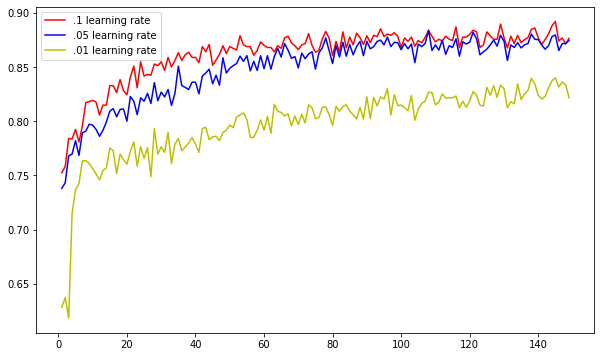

In [72]:
plt.figure(figsize=(10,6))
plt.plot(range(1,150),boosted_1,c='r',label=".1 learning rate")
plt.plot(range(1,150),boosted_05, c='b',label='.05 learning rate')
plt.plot(range(1,150),boosted_01, c='y',label='.01 learning rate')
plt.legend()

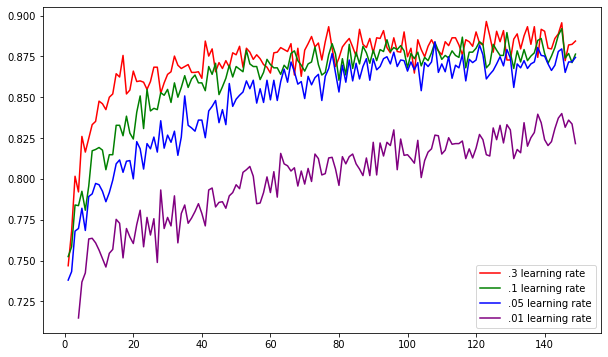

In [155]:
plt.figure(figsize=(10,6))
plt.plot(range(1,150),boosted_3,c='r',label=".3 learning rate")
#plt.plot(range(1,150),boosted_2,c='orange',label=".2 learning rate")
plt.plot(range(1,150),boosted_1,c='g',label=".1 learning rate")
plt.plot(range(1,150),boosted_05, c='b',label='.05 learning rate')
plt.plot(range(4,150),boosted_01[3:], c='purple',label='.01 learning rate')
plt.legend()

0.7838719999999999
0.021997445669895404


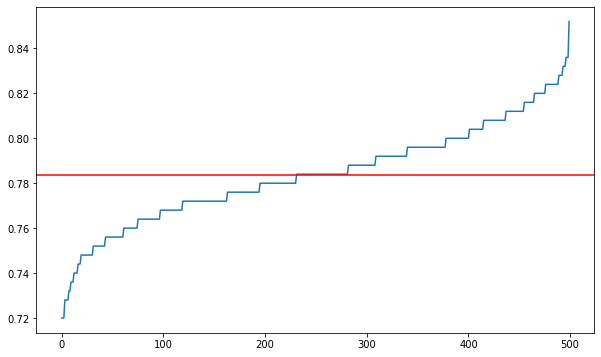

In [77]:
accuracy_scores_log = []
logistic = LogisticRegression(solver='lbfgs')
for n in range(0,500):
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2)
    logistic.fit(X2_train,y2_train)
    y_pred = logistic.predict(X2_test)
    accuracy_scores_log.append(accuracy_score(y2_test,y_pred))

accuracy_scores_log.sort()
plt.figure(figsize=(10,6))
plt.plot(range(0,500),accuracy_scores_log)
plt.axhline(np.mean(accuracy_scores_log),c='r')
print(np.mean(accuracy_scores_log))
print(np.std(accuracy_scores_log))

(array([  9.,  10.,  42., 102., 119.,  96.,  77.,  34.,  10.,   1.]),
 array([0.72  , 0.7332, 0.7464, 0.7596, 0.7728, 0.786 , 0.7992, 0.8124,
        0.8256, 0.8388, 0.852 ]),
 <a list of 10 Patch objects>)

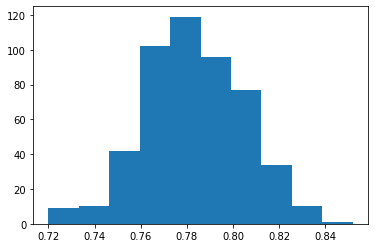

In [78]:
plt.hist(accuracy_scores_log)

In [82]:
def bagger(model,n_models):
    models = []
    for n in range(0,n_models):
    
        X_sample, X_out, y_sample, y_out = train_test_split(X2_train,y2_train)
        model.fit(X_sample, y_sample)
        models.append(model)
    
    predictions = []
    for model in models:
        y_pred = model.predict(X2_test)
        predictions.append(y_pred)
    
    bagged_predictions = []
    for n in range(0,len(predictions[0])):
        item_preds = []
        for prediction in predictions:
            item_preds.append(prediction[n])
        if np.mean(item_preds) < .5:
            bagged_predictions.append(0)
        else:
            bagged_predictions.append(1)
    return accuracy_score(y2_test,np.array(bagged_predictions))
    


0.7820719999999999
0.023983219466952303


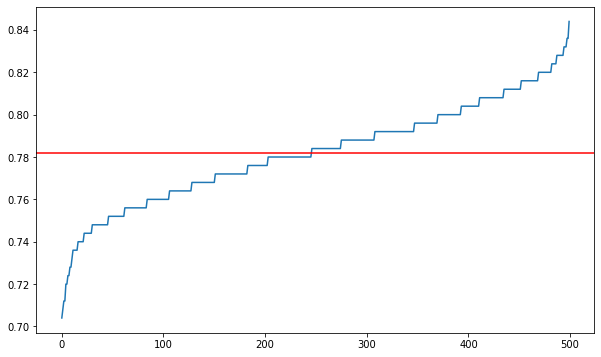

In [85]:
accuracy_scores_baglog = []
logistic = LogisticRegression(solver='lbfgs')
for n in range(0,500):
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2)
    accuracy_scores_baglog.append(bagger(logistic,100))

accuracy_scores_baglog.sort()
plt.figure(figsize=(10,6))
plt.plot(range(0,500),accuracy_scores_baglog)
plt.axhline(np.mean(accuracy_scores_baglog),c='r')
print(np.mean(accuracy_scores_baglog))
print(np.std(accuracy_scores_baglog))

In [124]:
bagger(logistic,100)

0.808

In [156]:
bagged_log = []
for n in range(1,100):
    blog = []
    for i in range(0,10):
        X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2)
        blog.append(bagger(logistic,n))
    bagged_log.append(np.mean(blog))
    

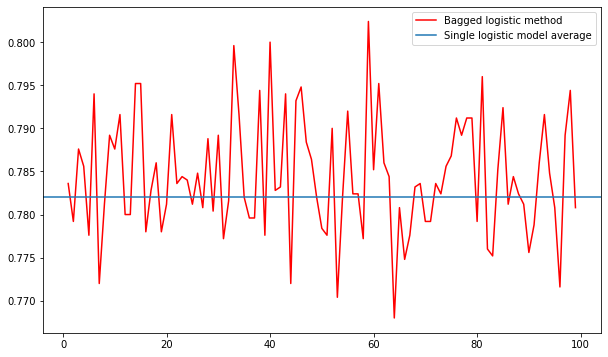

In [159]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),bagged_log,c='r', label='Bagged logistic method')
plt.axhline(np.mean(accuracy_scores_baglog), label = 'Single logistic model average')
plt.legend()

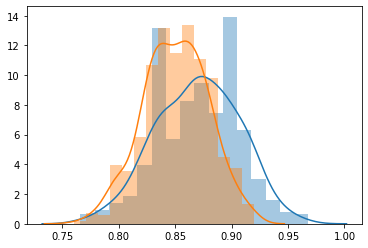

In [133]:
sns.distplot(accuracy_scores)
sns.distplot(accuracy_scores2, label='bagged')


In [140]:
bagged8 = []
bagged7 = []
bagged6 = []
bagged5 = []
for n in range(1,100):
    b8= []
    b7= []
    b6= []
    b5= []
    for i in range(0,10):
        X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2)
        b8.append(bagged_dtc(X2_train,y2_train,n,.8))
        b7.append(bagged_dtc(X2_train,y2_train,n,.8))
        b6.append(bagged_dtc(X2_train,y2_train,n,.8))
        b5.append(bagged_dtc(X2_train,y2_train,n,.8))
    bagged8.append(np.mean(b8))
    bagged7.append(np.mean(b7))
    bagged6.append(np.mean(b6))
    bagged5.append(np.mean(b5))

In [150]:
bagged4 = []
bagged3 = []
bagged2 = []

for n in range(1,100):
    b4= []
    b3= []
    b2= []

    for i in range(0,10):
        X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2)
        b4.append(bagged_dtc(X2_train,y2_train,n,.8))
        b3.append(bagged_dtc(X2_train,y2_train,n,.8))
        b2.append(bagged_dtc(X2_train,y2_train,n,.8))

    bagged4.append(np.mean(b4))
    bagged3.append(np.mean(b3))
    bagged2.append(np.mean(b2))
    print(n)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


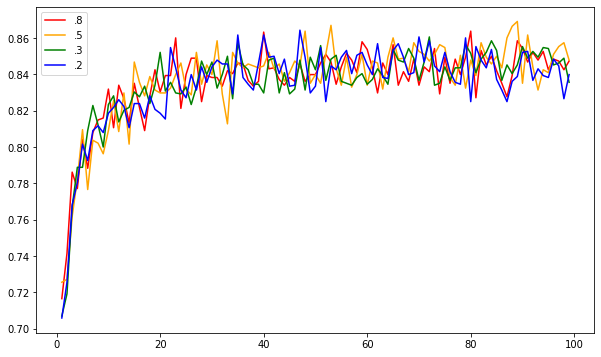

In [152]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),bagged8, c='r', label='.8')
plt.plot(range(1,100),bagged5, c='orange',label='.5')
plt.plot(range(1,100),bagged3, c='g',label='.3')
plt.plot(range(1,100),bagged2, c='b',label='.2')


plt.legend()